In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf
import numpy as np
from matplotlib import image
from tensorflow import keras
from tensorflow.keras import layers
from skimage.color import rgb2lab, lab2rgb
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential

In [2]:
import zipfile 
zip_ref = zipfile.ZipFile('/content/dog.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
ImagePath='/content/dog'

In [4]:
from sklearn.model_selection import train_test_split
img_size = 256
dataset_split = 1200

x = []
y = []
for image_file in os.listdir( ImagePath )[ 0 : dataset_split ]:
    rgb_image = Image.open( os.path.join( ImagePath , image_file ) ).resize( ( img_size , img_size ) )
    # Normalize the RGB image array
    rgb_img_array = (np.asarray( rgb_image ) ) / 255
    gray_image = rgb_image.convert( 'L' )
    # Normalize the grayscale image array
    gray_img_array = ( np.asarray( gray_image ).reshape( ( img_size , img_size , 1 ) ) ) / 255
    # Append both the image arrays
    x.append( gray_img_array )
    y.append( rgb_img_array )

# Train-test splitting
X_train, X_test, y_train, y_test = train_test_split( np.array(x) , np.array(y) , test_size=0.1 )


In [5]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(1080, 256, 256, 1)
(1080, 256, 256, 3)
(120, 256, 256, 1)
(120, 256, 256, 3)


In [6]:
import keras
from keras import layers


input_img =keras.Input(shape=(X_train.shape[1:]))

#256
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

#128
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

#64

x = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)
encoded = x


x = layers.Conv2DTranspose(8, (3, 3), strides=(2,2), activation='relu', padding='same')(encoded)
#128

x = layers.Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
#256


x= layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)
decoded = x

model = keras.Model(input_img, decoded)
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 3)         435   

In [ ]:
model.fit(X_train, y_train,
                epochs=500,
                batch_size=256,
                shuffle=True,
                )

In [8]:
y = model.predict(X_test)

4/4 [==============================] - 1s 114ms/step


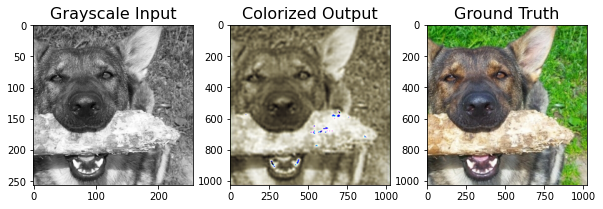

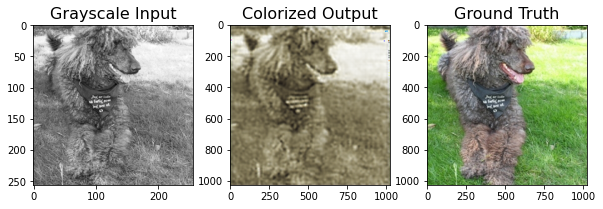

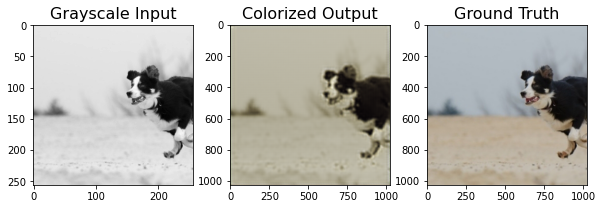

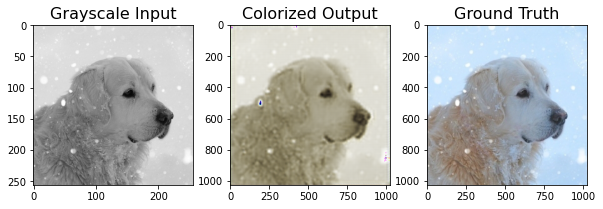

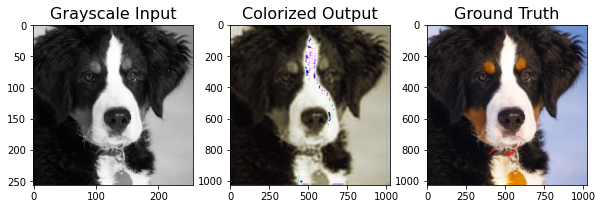

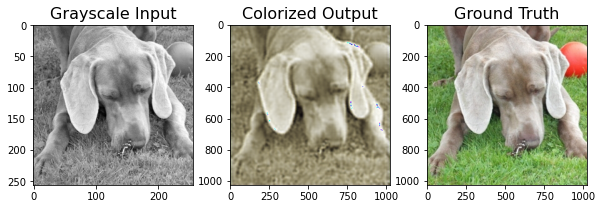

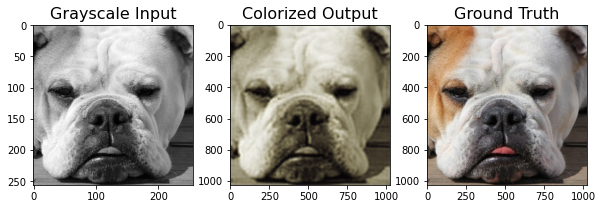

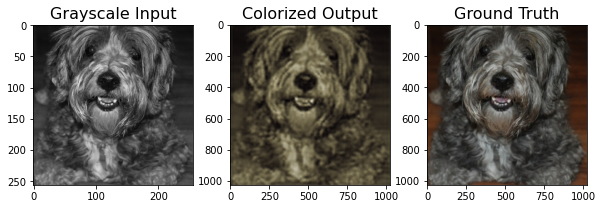

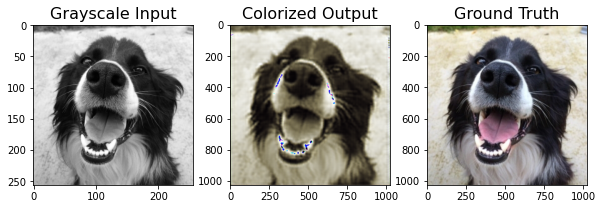

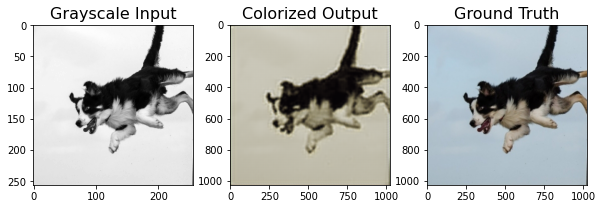

In [9]:
for i in range(10):
  plt.figure(figsize=(10,10))
  or_image = plt.subplot(3,3,1)
  or_image.set_title('Grayscale Input', fontsize=16)
  plt.imshow(X_test[i].reshape((256,256)) , cmap='gray' )

  in_image = plt.subplot(3,3,2)    
  image = Image.fromarray( ( y[i] * 255 ).astype( 'uint8' ) ).resize( ( 1024 , 1024 ) )
  image = np.asarray( image )
  in_image.set_title('Colorized Output', fontsize=16)
  plt.imshow( image )

  ou_image = plt.subplot(3,3,3)
  image = Image.fromarray( ( y_test[i] * 255 ).astype( 'uint8' ) ).resize( ( 1024 , 1024 ) )
  ou_image.set_title('Ground Truth', fontsize=16)
  plt.imshow( image )

  plt.show()